In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cars-dataset.csv')

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,1,0.0,5,14.4,5.1,0,2Wheeler
1,24,Male,1,0.0,6,10.6,6.1,0,2Wheeler
2,27,Female,1,0.0,9,15.5,6.1,0,2Wheeler
3,25,Male,0,0.0,1,7.6,6.3,0,2Wheeler
4,25,Female,0,0.0,3,9.6,6.7,0,2Wheeler


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,417.0,0.261391,0.439920,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.291866,3.697706,3.2,8.600,10.9,13.575,23.4
license,418.0,0.203349,0.402973,0.0,0.000,0.0,0.000,1.0


In [5]:
#Checar valores null
df.isna().any().any()

True

In [6]:
#Vamos descobrir quem é null
for a in df.columns:
    print(a, df[a].isnull().sum())
#MBA tem um valor vazio

Age 0
Gender 0
Engineer 0
MBA 1
Work Exp 0
Salary 0
Distance 0
license 0
Transport 0


In [7]:
#Eliminando essa linha
df.dropna(axis=0, inplace=True, how='any')
df.reset_index(drop=True, inplace=True)

In [8]:
#Checar valores null
df.isna().any().any()

False

In [9]:
df.shape

(417, 9)

In [10]:
#Checagem do tipo de dados
df.dtypes

Age            int64
Gender        object
Engineer       int64
MBA          float64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [11]:
#A maior parte dos indivíduos utilizam transporte público (quase 72%)
for k, v in df.Transport.value_counts().items():
    print('{} % dos indivíduos utilizam {},'.format(round(v*100/df.Transport.value_counts().sum(),3), k))

71.703 % dos indivíduos utilizam Public Transport,
19.904 % dos indivíduos utilizam 2Wheeler,
8.393 % dos indivíduos utilizam Car,


# Caso clássico de problema de classificação com dados desbalanceados

In [12]:
#Quantidade de mulheres e homens
df.Gender.value_counts()
#Mais do dobro dos dados são homens

Male      297
Female    120
Name: Gender, dtype: int64

In [13]:
#Agrupando valores pelo tipo de transporte e verificando a média
df.groupby('Transport').mean()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Transport,,,,,,,
2Wheeler,25.265060,0.722892,0.204819,4.060241,12.609639,12.044578,0.277108
Car,36.714286,0.857143,0.257143,17.514286,41.294286,17.880000,0.828571
Public Transport,26.809365,0.745819,0.277592,5.013378,13.174916,10.318060,0.110368


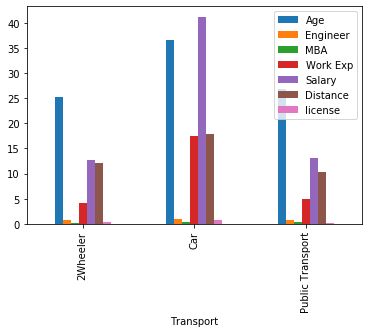

In [14]:
df.groupby('Transport').mean().plot(kind='bar')

In [15]:
#Tornando objeto em categoria
#df.loc[:, df.select_dtypes(include = ['object']).columns] = df.select_dtypes(include=['object']).astype('category')

In [16]:
#features binários
bina = []
for c in df.columns:
    if df[c].nunique() == 2:
        bina.append(c)
bina

['Gender', 'Engineer', 'MBA', 'license']

In [17]:
#Features numéricos sem os binários
numericos = df.drop(bina, axis=1).select_dtypes(exclude=['category'])

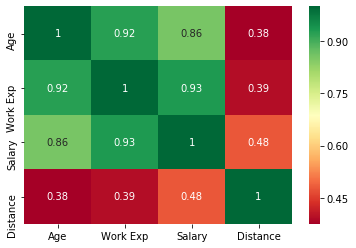

In [18]:
sns.heatmap(numericos.corr(), annot=True, cmap='RdYlGn')

In [19]:
#A feature que exibe menor correlação com as demais é a Distância, mas isso não quer dizer que não seja boa feature
#para caracterizar o output Transport.

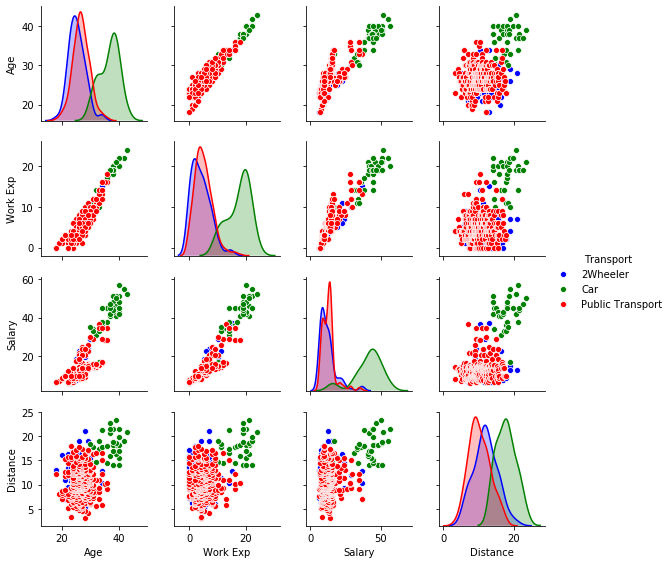

In [20]:
colors = ['b', 'g', 'r']
color_dict = {}
for idx, v in enumerate(np.unique(df['Transport'])):
    color_dict[v] = colors[idx]
    
sns.pairplot(numericos, size=2, hue= 'Transport', palette= color_dict)

## No gráfico acima, pode-se ver que os transportes 2Wheeler e Public possuem dispersão próxima, formando basicamente um mesmo grupo. Apenas a classe carro se sobressai.

In [21]:
#tornando variável gênero numérica e armazenando em "Gen"
#dicionário para mapear
d = {"Female": 0, "Male": 1}
df["Gen"] = df.Gender.map(d)

In [22]:
df.drop('Gender', axis=1, inplace=True)

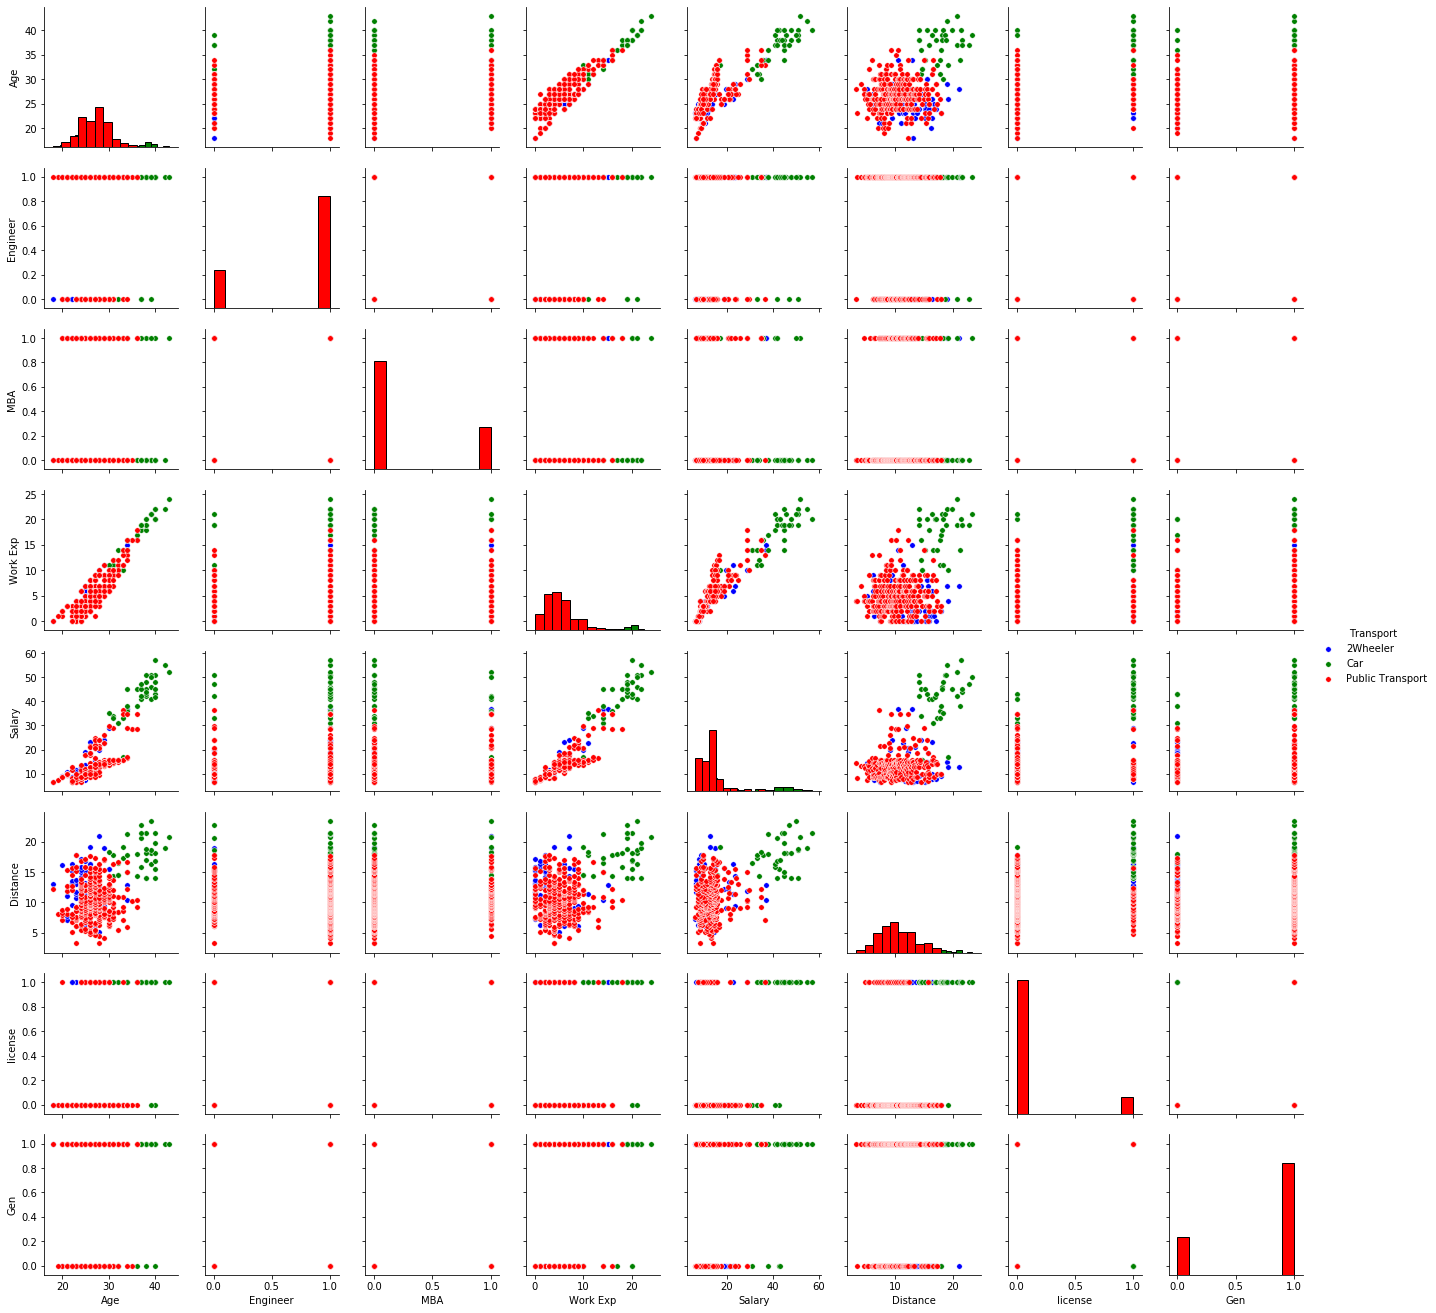

In [23]:
colors = ['b', 'g', 'r']
color_dict = {}
for idx, v in enumerate(np.unique(df['Transport'])):
    color_dict[v] = colors[idx]
    
g = sns.PairGrid(df, hue='Transport', height=2.3, palette=color_dict)  
g = g.map_diag(plt.hist, edgecolor='k', lw= 1)
g = g.map_offdiag(plt.scatter,lw = .5, edgecolor='w', s=30)
g = g.add_legend()
plt.show()

# Por profissão

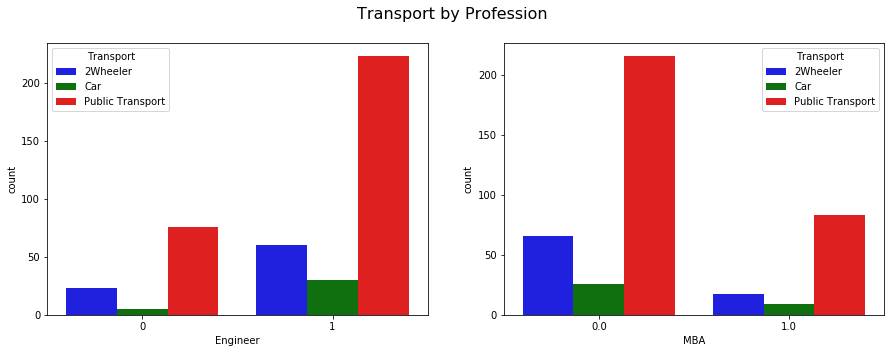

In [24]:
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='Engineer',hue='Transport' ,data=df, ax=axs[0], palette=color_dict)
sns.countplot(x='MBA',hue='Transport' ,data=df, ax=axs[1], palette=color_dict)
fig.suptitle('Transport by Profession', fontsize=16);

In [25]:
print('Indivíduos que são ou não engenheiros e o tipo de transporte que utilizam:\n')
for a in [0,1]:
    for c in df.Transport.unique():
        print(a, c,(len('Public Transport') - len(c))*'-', 
              round(df[(df.Engineer == a) & (df.Transport==c)].shape[0]))

Indivíduos que são ou não engenheiros e o tipo de transporte que utilizam:

0 2Wheeler -------- 23
0 Car ------------- 5
0 Public Transport  76
1 2Wheeler -------- 60
1 Car ------------- 30
1 Public Transport  223


In [26]:
print('A porcentagem de engenheiros que vão de carro é: {} %'.format(round(30*100/(60+30+223),2)))
print('A porcentagem de NÃO engenheiros que vão de carro é: {} %'.format(round(5*100/(23+5+76),2)))

A porcentagem de engenheiros que vão de carro é: 9.58 %
A porcentagem de NÃO engenheiros que vão de carro é: 4.81 %


### Isso indica que, relativamente falando, a probabilidade de uma pessoa ir de carro e não de outro transporte é o dobro quando o indivíduo é engenheiro, em relação a quando não é!

In [27]:
print('A porcentagem de engenheiros que vão de Transporte público é: {} %'.format(round(223*100/(60+30+223),2)))
print('A porcentagem de NÃO engenheiros que vão de Transporte público é: {} %'.format(round(76*100/(23+5+76),2)))

A porcentagem de engenheiros que vão de Transporte público é: 71.25 %
A porcentagem de NÃO engenheiros que vão de Transporte público é: 73.08 %


### Isso indica que, relativamente falando, a probabilidade de uma pessoa ir de transporte público não tem relação com ela ser ou não engenheiro!

In [28]:
print('A porcentagem de engenheiros que vão de 2Wheeler é: {} %'.format(round(60*100/(60+30+223),2)))
print('A porcentagem de NÃO engenheiros que vão de 2Wheeler é: {} %'.format(round(23*100/(23+5+76),2)))

A porcentagem de engenheiros que vão de 2Wheeler é: 19.17 %
A porcentagem de NÃO engenheiros que vão de 2Wheeler é: 22.12 %


### Isso indica que, relativamente falando, a probabilidade de uma pessoa ir de 2Wheeler não tem relação com ela ser ou não engenheiro!

In [29]:
#Do exposto acima, observa-se que ser ou não engenheiro influencia no uso ou não de carro, mas não influencia 
#quanto ao uso do transporte público ou 2Wheeler!!!

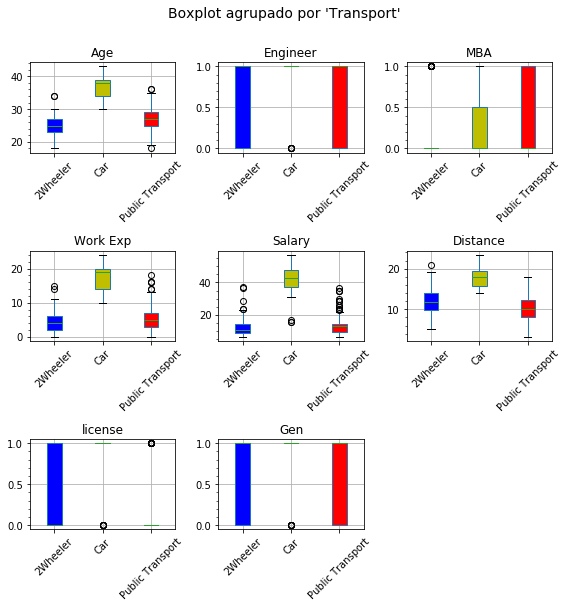

In [30]:
from matplotlib.patches import PathPatch
from matplotlib.ticker import AutoLocator, AutoMinorLocator

fig, axes = plt.subplots(3,3,figsize=(8,8))

for i, el in enumerate(list(df.drop('Transport', axis=1).columns.values)):
    bp_dict = df.boxplot(el, by="Transport", ax=axes.flatten()[i], return_type='both',
    patch_artist = True,
    rot = 45)
    
    for row_key, (ax, row) in bp_dict.items():
        ax.set_xlabel('')

    ##removendo axes compartilhados:
    grouper = ax.get_shared_y_axes()
    shared_ys = [a for a in grouper]
    for ax_list in shared_ys:
        for ax2 in ax_list:
            grouper.remove(ax2)
    
    ##setando limites:
    ax.axis('auto')
    ax.relim()
    #setando tick menor e maior
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    plt.setp(ax.get_yticklabels(), visible=True)
            
    #setando cores para cada tipo de transporte     
    colors = ['b', 'y', 'r' ]
    for i, box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
            
fig.delaxes(axes[2,2]) #Deletando axes vazio
fig.suptitle("Boxplot agrupado por 'Transport'", fontsize=14, y=1.05)
plt.tight_layout() 

plt.show()

### Note que, não faz muito sentido utilizar variável binária para este gráfico acima. No entanto, podemos tirar alguns insights olhando as outras features. Por exemplo: Pessoas acima dos 30 anos, usam o carro, ao passo que pessoas entre 24 e 28 anos tendem a utilizar o transporte público e pessoas abaixo de 24 anos usam o 2wheeler ~(WTF)~? ! Pessoas com mais experiência de trabalho acima de 10 anos utilizam carro, enquanto pessoas com experiência abaixo disso, tendem a utilizar um dos outros dois meios. indivíduos com salário mais alto utilizam o carro, enquanto indivíduos com salário mais baixo vão de carro ou 2wheeler. Trabalhadores que moram mais longe priorizam ir de carro, enquanto os que estão a distâncias intermediárias, vão de 2wheeler e os que moram mais próximos, pegam transporte público.

In [31]:
'''##creating the boxplot array:
bp_dict = df.boxplot(
    by="Transport",layout = (3,3),figsize=(8,8),
    return_type='both',
    patch_artist = True,
    rot = 90,
)

colors = ['b', 'y', 'r' ]
##Ajuste das instancias dos axes
for row_key, (ax, row) in bp_dict.items():
    ax.set_xlabel('')

    ##removendo axes compartilhados:
    grouper = ax.get_shared_y_axes()
    shared_ys = [a for a in grouper]
    for ax_list in shared_ys:
        for ax2 in ax_list:
            grouper.remove(ax2)

    ##setando limites:
    ax.axis('auto')
    ax.relim()

    #ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    plt.setp(ax.get_yticklabels(), visible=True)
    for i, box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
plt.show()'''

'##creating the boxplot array:\nbp_dict = df.boxplot(\n    by="Transport",layout = (3,3),figsize=(8,8),\n    return_type=\'both\',\n    patch_artist = True,\n    rot = 90,\n)\n\ncolors = [\'b\', \'y\', \'r\' ]\n##Ajuste das instancias dos axes\nfor row_key, (ax, row) in bp_dict.items():\n    ax.set_xlabel(\'\')\n\n    ##removendo axes compartilhados:\n    grouper = ax.get_shared_y_axes()\n    shared_ys = [a for a in grouper]\n    for ax_list in shared_ys:\n        for ax2 in ax_list:\n            grouper.remove(ax2)\n\n    ##setando limites:\n    ax.axis(\'auto\')\n    ax.relim()\n\n    #ax.yaxis.set_major_locator(AutoLocator())\n    ax.yaxis.set_minor_locator(AutoMinorLocator())\n    \n    plt.setp(ax.get_yticklabels(), visible=True)\n    for i, box in enumerate(row[\'boxes\']):\n        box.set_facecolor(colors[i])\nplt.show()'

In [32]:
df.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gen
0,28,1,0.0,5,14.4,5.1,0,2Wheeler,1
1,24,1,0.0,6,10.6,6.1,0,2Wheeler,1
2,27,1,0.0,9,15.5,6.1,0,2Wheeler,0
3,25,0,0.0,1,7.6,6.3,0,2Wheeler,1
4,25,0,0.0,3,9.6,6.7,0,2Wheeler,0


# Modelagem!

## Algumas conversões para a modelagem

In [33]:
df['Car']=[1 if x=='Car' else 0 for x in df['Transport']]
df['PublicTransport']=[1 if x=='Public Transport' else 0 for x in df['Transport']]
df['2Wheeler']=[1 if x=='2Wheeler' else 0 for x in df['Transport']]

In [34]:
df.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gen,Car,PublicTransport,2Wheeler
0,28,1,0.0,5,14.4,5.1,0,2Wheeler,1,0,0,1
1,24,1,0.0,6,10.6,6.1,0,2Wheeler,1,0,0,1
2,27,1,0.0,9,15.5,6.1,0,2Wheeler,0,0,0,1
3,25,0,0.0,1,7.6,6.3,0,2Wheeler,1,0,0,1
4,25,0,0.0,3,9.6,6.7,0,2Wheeler,0,0,0,1


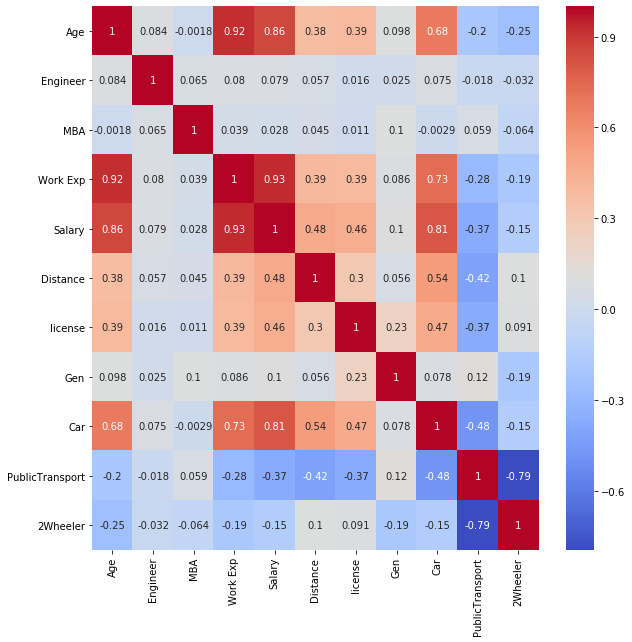

In [35]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))

sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')

## Correlação das variáveis com quem usa carro

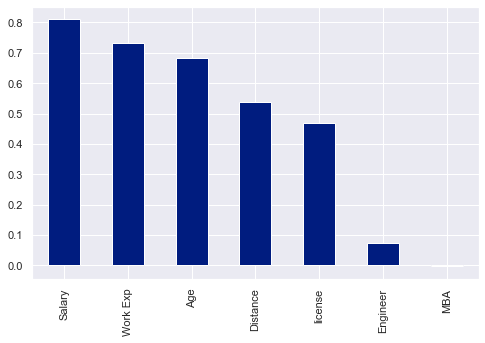

In [36]:
sns.set(style='darkgrid', palette="dark")
fig, ax=plt.subplots(figsize=(8,5))
df.corr()['Car'][:-4].sort_values(ascending = False).plot(kind='bar')

### Vamos agora utilizar Regressão logística para predizer o uso de carro pelos indivíduos

In [37]:
df.head(1)

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gen,Car,PublicTransport,2Wheeler
0,28,1,0.0,5,14.4,5.1,0,2Wheeler,1,0,0,1


In [38]:
df1 = df.drop(['PublicTransport','2Wheeler', 'Transport'], axis=1)

In [39]:
df1.head(1)

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gen,Car
0,28,1,0.0,5,14.4,5.1,0,1,0


In [41]:
X=df1.iloc[:,:-1]
y=df1.loc[:,'Car']

In [42]:
#plot precicion, recall and thresholds
#predicted_proba[:,1]
def plotPrecisionRecallThreshold(y_test, pred_prob):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred_prob) 
   #retrieve probability of being 1(in second column of probs_y)
    pr_auc = metrics.auc(recall, precision)
    plt.title("Precisão-Recall vs Gráfico para limite")
    plt.plot(thresholds, precision[: -1], "b--", label="Precisão")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precisão, Recall")
    plt.xlabel("Limite")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    
def plotROC(y_test,pred_prob):
    fpr, tpr, threshold=metrics.roc_curve(y_test,pred_prob)
    plt.title("Curva ROC")
    sns.lineplot(x=fpr,y=tpr,palette="muted")
    plt.ylabel("Taxa de Verdadeiros positivos")
    plt.xlabel("Taxa de Falsos Positivos")
    
def areaUnderROC(y_test, pred_prob):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred_prob) 
    return metrics.auc(recall, precision)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=232)

In [44]:
model = LogisticRegression(penalty='none', solver='saga')
result = model.fit(X_train, y_train)

Acurácia: 0.98 

probabilidades 

[0.3741719742483204, 0.4917493550812114, 0.49054636414765884, 0.6223014998755648, 0.539823487021074, 0.5842475564222763, 0.5026273977265253, 0.48781016475993205]


coefficients 

[-0.5143601  -0.03300558 -0.03781905  0.49932844  0.15963207  0.3402348
  0.01050969 -0.048769  ]
AxesSubplot(0.125,0.125;0.775x0.755)


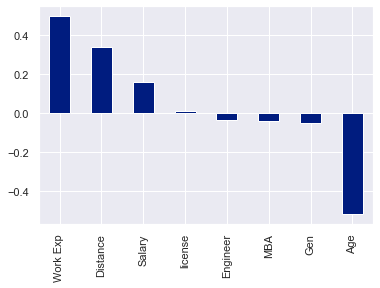

In [45]:
from math import exp
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print('Acurácia: %.2f \n' %(metrics.accuracy_score(y_test, prediction_test)))
print('probabilidades \n')
print([exp(x)/(1+exp(x)) for x in model.coef_.flatten()])
print('\n')
print('coefficients \n')
print(model.coef_.flatten())
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [46]:
# Acurácia de 98 %!

# Matriz de confusão

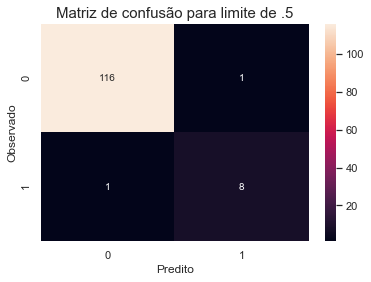

In [47]:
arr=metrics.confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(arr, range(2),range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt="d")
plt.xlabel("Predito")
plt.ylabel("Observado")
plt.title("Matriz de confusão para limite de .5", fontsize = 15);

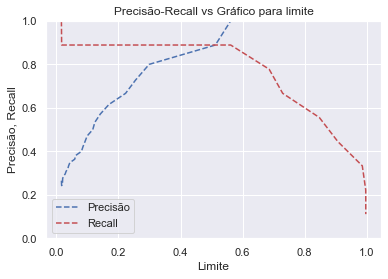

In [48]:
predicted_proba=model.predict_proba(X_test)
plotPrecisionRecallThreshold(y_test, predicted_proba[:,1])

Área sob a curva: 0.92


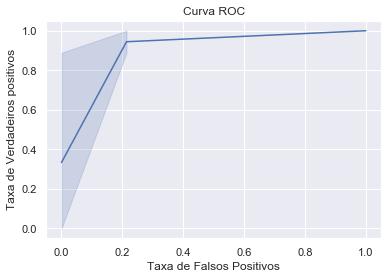

In [49]:
plotROC(y_test, predicted_proba[:,1])
print('Área sob a curva: %.2f' %areaUnderROC(y_test, predicted_proba[:,1]))